In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers
from glob import glob
from PIL import Image
import os
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [25]:
!nvidia-smi

Tue Jun  7 07:20:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 440.82       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:03:00.0 Off |                  N/A |
| 35%   60C    P8    13W / 250W |  10561MiB / 11176MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:04:00.0 Off |                  N/A |
| 68%   79C    P2    74W / 250W |  10728MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [26]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
# GPU 할당 상태 확인

tf.test.is_gpu_available()


True

In [3]:
# !unzip -uq 'test-20220603T000915Z-001.zip' -d 'test'

In [4]:
# !unzip -uq 'train-20220603T000944Z-001.zip' -d 'train'

In [5]:
# !unzip -uq 'valid-20220603T000946Z-001.zip' -d 'valid'

In [3]:
# 데이터 packing

image_dates_train_nak = glob('./train/1*.jpg')
image_dates_train_scub = glob('./train/2*.jpg')
image_dates_train_oster = glob('./train/3*.jpg')

image_dates_valid_nak = glob('./valid/1*.jpg')
image_dates_valid_scub = glob('./valid/2*.jpg')
image_dates_valid_oster = glob('./valid/3*.jpg')

image_dates_test_nak = glob('./test/1*.jpg')
image_dates_test_scub = glob('./test/2*.jpg')
image_dates_test_oster = glob('./test/3*.jpg')

class_name = ['nacksungdae','scubhome', 'osteria']
dic = {'nacksungdae' : 0, 'scubhome' : 1, 'osteria' : 2}

In [4]:
X_train = []
Y_train = []
X_valid = []
Y_valid = []
X_test = []
Y_test = []

for imagename in image_dates_train_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(0)
    
for imagename in image_dates_train_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(1)    
    
for imagename in image_dates_train_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(2)
    
for imagename in image_dates_valid_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(0)
    
for imagename in image_dates_valid_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(1)    
    
for imagename in image_dates_valid_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(2)
    
for imagename in image_dates_test_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(0)
    
for imagename in image_dates_test_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(1)    
    
for imagename in image_dates_test_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(2)
    
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape, Y_train.shape)
print(X_valid.shape, Y_valid.shape)
print(X_test.shape, Y_test.shape)

(9180, 200, 200, 3) (9180,)
(3060, 200, 200, 3) (3060,)
(3060, 200, 200, 3) (3060,)


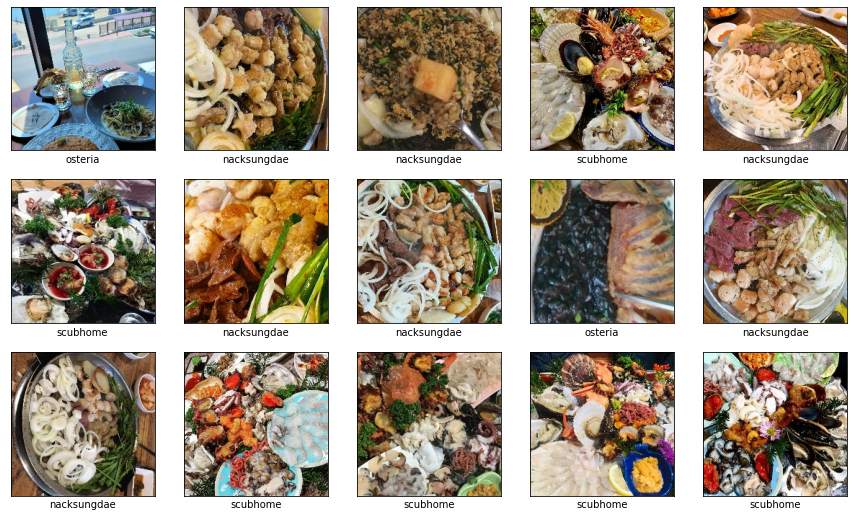

In [5]:
# train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 44)

# print(train_images.shape, test_images.shape)
# print(train_labels.shape, test_labels.shape)
%matplotlib inline 
N_TRAIN = X_train.shape[0]
N_TEST = X_valid.shape[0]

plt.figure(figsize = (15, 9))

# train data image 확인

for i in range(15):
    img_idx = np.random.randint(0, N_TRAIN)
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(X_train[img_idx])
    plt.xlabel(class_name[Y_train[img_idx]])

In [6]:
#데이터 클래스가 잘 나뉘었는지 확인

unique, counts = np.unique(np.reshape(Y_train, (N_TRAIN,)), axis = -1, return_counts = True)
dict(zip(unique, counts))

{0: 3060, 1: 3060, 2: 3060}

In [7]:
#min-max scaling

X_train = X_train.astype(np.float32) / 255
X_valid = X_valid.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

x_train = X_train.reshape(-1, 200, 200, 3)
x_valid = X_valid.reshape(-1, 200, 200, 3)
x_test = X_test.reshape(-1, 200, 200, 3)

y_train = Y_train
y_test = Y_test
y_valid = Y_valid


print('train data : X ', x_train.shape, ' Y ', y_train.shape)
print('valid data : X ', x_valid.shape, ' Y ', y_valid.shape)
print('test data : X ', x_test.shape, ' Y ', y_test.shape)

train data : X  (9180, 200, 200, 3)  Y  (9180,)
valid data : X  (3060, 200, 200, 3)  Y  (3060,)
test data : X  (3060, 200, 200, 3)  Y  (3060,)


## Model 1(CNN 실습코드)

In [17]:
data = [x_train, y_train, x_valid, y_valid, x_test, y_test]

def train(model, x_train, y_train, x_valid, y_valid, x_test, y_test, epoch = 100, lr = 0.1):
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=lr), metrics = ['accuracy'])
    result = model.fit(x_train, y_train, epochs = epoch, batch_size = 128, validation_data = (x_valid, y_valid))
    test_result = cnn.evaluate(x_test, y_test)

    # show the learning curve
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('CNN ACCURACY')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['train','validation'], loc = 'best')

In [18]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(200, 200, 3))
        self.maxpool1 = layers.MaxPool2D(3, strides=2, padding='same')
        self.conv2 = layers.Conv2D(64, 3, strides=1, padding='same', activation='relu')
        self.maxpool2 = layers.MaxPool2D(3, strides=2, padding='same')
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(3, activation='softmax')
        

    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

Epoch 1/100
72/72 [==============================] - 8s 110ms/step - loss: 1.1197 - accuracy: 0.4022 - val_loss: 1.0895 - val_accuracy: 0.3990
Epoch 2/100
72/72 [==============================] - 7s 97ms/step - loss: 1.0841 - accuracy: 0.3886 - val_loss: 1.0879 - val_accuracy: 0.3503
Epoch 3/100
72/72 [==============================] - 7s 97ms/step - loss: 1.0803 - accuracy: 0.4171 - val_loss: 1.0900 - val_accuracy: 0.3402
Epoch 4/100
72/72 [==============================] - 7s 97ms/step - loss: 1.1405 - accuracy: 0.3928 - val_loss: 1.0459 - val_accuracy: 0.5147
Epoch 5/100
72/72 [==============================] - 7s 98ms/step - loss: 1.0644 - accuracy: 0.4326 - val_loss: 1.0178 - val_accuracy: 0.5487
Epoch 6/100
72/72 [==============================] - 7s 98ms/step - loss: 0.9399 - accuracy: 0.5347 - val_loss: 0.8124 - val_accuracy: 0.6516
Epoch 7/100
72/72 [==============================] - 7s 97ms/step - loss: 1.0149 - accuracy: 0.4302 - val_loss: 1.0968 - val_accuracy: 0.3333
Epoch

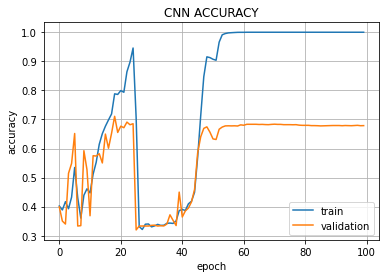

In [19]:
cnn = CNN()
train(cnn, *data)

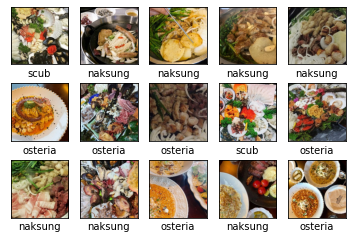

In [20]:
# 학습 결과 labeling

for i in range(15):
    img_idx = np.random.randint(0, 3060)
    im = np.reshape(x_test[img_idx], (-1, 200, 200, 3))
    classnum = np.argmax(cnn.predict(im))
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(x_test[img_idx])
    name = ''
    if classnum == 0 : name = 'naksung'
    elif classnum == 1 : name = 'scub'
    else : name = 'osteria'
    plt.xlabel(name)

## Model 3(CNN 2)

In [19]:
def train(net, x_train, y_train, x_valid, y_valid, x_test, y_test, epochs = 5):
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
    net.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])
    result = net.fit(x_train, y_train, epochs = epochs, batch_size = 128,
                     validation_data = (x_valid, y_valid), verbose = 1)
    
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['train', 'validation'], loc = 'best')
    plt.show()

def make_conv_block(num_filters, filter_size, stride, padding = 'same', input_shape = None):
    conv_block = Sequential()
    conv_block.add(layers.Conv2D(num_filters,
                                 filter_size,
                                 strides = stride,
                                 padding = padding,
                                 activation = 'relu'))
    
    conv_block.add(layers.Conv2D(num_filters,
                                 filter_size,
                                 strides = stride,
                                 padding = padding,
                                 activation = 'relu'))
    
    conv_block.add(layers.Conv2D(num_filters,
                                 filter_size,
                                 strides = stride,
                                 padding = padding,
                                 activation = 'relu'))
    
    return conv_block


class CNN(Model):
    def __init__(self, num_classes = 10):
        super(CNN, self).__init__()
        self.convblock1 = make_conv_block(32, 3, 1)
        self.bn1 = layers.BatchNormalization()
        self.convblock2 = make_conv_block(32, 3, 1)
        self.maxpool1 = layers.MaxPool2D(pool_size = 3,
                         strides = 2,
                         padding = 'same')
        
        self.convblock3 = make_conv_block(64, 3, 1)
        self.bn2 = layers.BatchNormalization()
        self.convblock4 = make_conv_block(64, 3, 1)
        self.maxpool2 = layers.MaxPool2D(pool_size = 3,
                         strides = 2,
                         padding = 'same')
        
        self.convblock5 = make_conv_block(32, 3, 1)
        self.bn3 = layers.BatchNormalization()
        self.convblock6 = make_conv_block(32, 3, 1)
        self.maxpool3 = layers.MaxPool2D(pool_size = 3,
                         strides = 2,
                         padding = 'same')
        
        self.flatten = layers.Flatten()
        
        self.fc1 = layers.Dense(128, activation = 'relu')
        self.fc2 = layers.Dense(64, activation = 'relu')
        
        self.fc3 = layers.Dense(num_classes, activation = 'softmax')
        
    
    def call(self, x):
        x = self.convblock1(x)
        x = self.bn1(x)
        x = self.convblock2(x)
        x = self.maxpool1(x)
        
        x = self.convblock3(x)
        x = self.bn2(x)
        x = self.convblock4(x)
        x = self.maxpool2(x)
        
        x = self.convblock5(x)
        x = self.bn3(x)
        x = self.convblock6(x)
        x = self.maxpool3(x)
        
        
        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.fc2(x)
        
        x = self.fc3(x)
        
        return x

In [20]:
data = [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [ ]:
cnn2 = CNN(num_classes = 3)
train(cnn2, *data, epochs = 20)

In [ ]:
test_result = cnn2.evaluate(x_test, y_test)
print('test loss: ', test_result[0])
print('test acc: ', test_result[1])

In [ ]:
# 학습 결과 labeling

for i in range(15):
    img_idx = np.random.randint(0, N_TRAIN)
    im = np.reshape(x_train[img_idx], (-1, 200, 200, 3))
    classnum = np.argmax(cnn.predict(im))
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(x_train[img_idx])
    name = ''
    if classnum == 0 : name = 'naksung'
    elif classnum == 1 : name = 'scub'
    else : name = 'osteria'
    plt.xlabel(name)

## Model 3(VGG16 Pretrained 모델)

In [8]:
from tensorflow.keras.applications import VGG16

vgg_base = VGG16(weights='imagenet',
                 include_top=False,        # class 3개로 분류 학습시켜야 해서 레이어 분리시킨 후, Desnse(3) 추가..?
                 input_shape=(200, 200, 3))

In [9]:
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(vgg_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4718848   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 19,434,307
Trainable params: 19,434,307
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=2e-5),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train, epochs=30, batch_size=200, validation_data=(x_valid, y_valid))

Epoch 1/30
46/46 [==============================] - 83s 2s/step - loss: 1.1561 - acc: 0.3391 - val_loss: 1.1328 - val_acc: 0.3425
Epoch 2/30
46/46 [==============================] - 79s 2s/step - loss: 1.1076 - acc: 0.3534 - val_loss: 1.1018 - val_acc: 0.3572
Epoch 3/30
46/46 [==============================] - 79s 2s/step - loss: 1.0835 - acc: 0.3722 - val_loss: 1.0844 - val_acc: 0.3761
Epoch 4/30
46/46 [==============================] - 79s 2s/step - loss: 1.0681 - acc: 0.4015 - val_loss: 1.0721 - val_acc: 0.4013
Epoch 5/30
46/46 [==============================] - 79s 2s/step - loss: 1.0562 - acc: 0.4353 - val_loss: 1.0618 - val_acc: 0.4271
Epoch 6/30
46/46 [==============================] - 79s 2s/step - loss: 1.0456 - acc: 0.4674 - val_loss: 1.0524 - val_acc: 0.4575
Epoch 7/30
46/46 [==============================] - 79s 2s/step - loss: 1.0354 - acc: 0.4989 - val_loss: 1.0430 - val_acc: 0.4866
Epoch 8/30
46/46 [==============================] - 79s 2s/step - loss: 1.0252 - acc: 0.53

In [13]:
test_result = model.evaluate(x_test, y_test)

96/96 [==============================] - 6s 63ms/step - loss: 0.6249 - acc: 0.8500


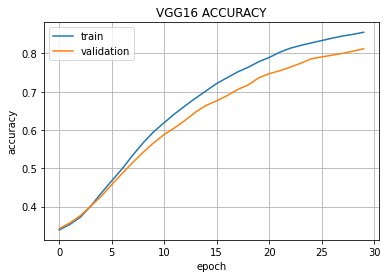

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('VGG16 ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train','validation'], loc = 'best')